In [1]:
import numpy as np
# e = lim(x→inf) (1+1/x)^x
print(np.e)
print(np.exp(1))
print(np.exp(2))

2.718281828459045
2.718281828459045
7.38905609893065


(-0.1, 1.1)

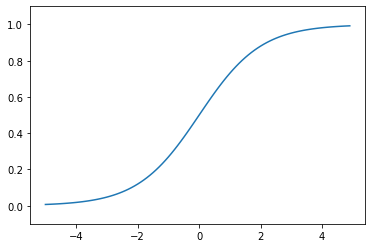

In [2]:
# 로지스틱 함수는 시그모이드 함수의 일종 : S자 모양
%matplotlib inline
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

X=np.arange(-5.0,5.0,0.1)
y=sigmoid(X)
plt.plot(X,y)
plt.ylim(-0.1,1.1)

In [3]:
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
from sklearn.datasets import make_classification
import statsmodels.api as sm

X, y=make_classification(n_features=1, n_redundant=0, n_informative=1, n_clusters_per_class=1, random_state=4)
logit_mod=sm.Logit(y,X)
logit_res=logit_mod.fit()
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.162261
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.7658
Time:                        13:09:55   Log-Likelihood:                -16.226
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.1866      0.884      4.738      0.000       2.455       5.919


In [4]:
# 예측값은 0.0~1.0 사이의 실수값
result=logit_res.predict(X)[:5]
for a in result:
    print(int(round(a)), end=' ') # 반올림 처리

0 1 0 1 0 

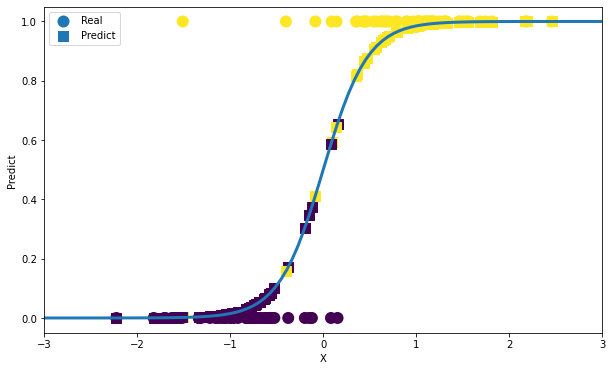

In [5]:
xx=np.linspace(-3,3,100)
pred=logit_res.predict(xx) # 모형이 예측한 값
plt.figure(figsize=(10,6))
plt.plot(xx, pred, lw=3) # lw = line width
plt.scatter(X, y, c=y, s=100, lw=2, label='Real')
plt.scatter(X, logit_res.predict(X), label='Predict', marker='s', c=y, s=100, lw=1)
plt.xlim(-3,3)
plt.xlabel('X')
plt.ylabel('Predict')
plt.legend()

In [6]:
# 로지스틱 회귀 모형의 성능 측정
# log_loss() : 로그 손실값(분류 모형의 성능을 평가할 때 사용하는 값)
# 100% 확률로 답을 구한 경우 : -ln(1.0)=0
# 80% 확률 : -ln(0.8)=0.22314
# 60% 확률 : -ln(0.6)=0.51082
# 확률이 낮아질수록 log loss는 크게 증가한다. 확률이 낮을 때 더 많은 패널티를 부여

from sklearn.metrics import log_loss

y_hat=logit_res.predict(X)
log_loss(y, y_hat, normalize=False) # normalize : 정규화 여부

16.226122466352443

In [7]:
# 실제 y값을 평균
mu_null=np.sum(y)/len(y)
mu_null

0.51

In [8]:
np.ones_like(y) # y리스트와 같은 사이즈로 값을 1로 초기화한 리스트

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [10]:
# 실제 y값의 평균으로 계산한 로그 손실값
y_null=np.ones_like(y)*mu_null
print(y_null)
log_loss(y, y_null, normalize=False)

[0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51 0.51
 0.51 0.51]


69.29471672244784

In [11]:
# 결정계수값 (Pseudo R-square)
1-(log_loss(y, y_hat)/log_loss(y, y_null))

0.7658389667520492

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=0)

In [13]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [14]:
print(model.classes_) # 출력값
print(model.intercept_) # 절편
print(model.coef_) # 회귀계수

[0 1]
[0.01210487]
[[2.99972644]]


In [15]:
model.predict_proba(X_test) # [0일 확률, 1일 확률]

array([[0.00935192, 0.99064808],
       [0.00428094, 0.99571906],
       [0.98204208, 0.01795792],
       [0.11773589, 0.88226411],
       [0.10564409, 0.89435591],
       [0.94862134, 0.05137866],
       [0.9892088 , 0.0107912 ],
       [0.13379119, 0.86620881],
       [0.00138017, 0.99861983],
       [0.84331206, 0.15668794],
       [0.8996786 , 0.1003214 ],
       [0.94798802, 0.05201198],
       [0.91098884, 0.08901116],
       [0.25466241, 0.74533759],
       [0.04540992, 0.95459008],
       [0.96422105, 0.03577895],
       [0.99385324, 0.00614676],
       [0.88332811, 0.11667189],
       [0.85162766, 0.14837234],
       [0.03287681, 0.96712319]])

In [16]:
model.predict(X_test)

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [17]:
model.score(X_test, y_test)

0.95

In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[10,  0],
       [ 1,  9]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))
# precision(정확도, 정밀도) : 모델이 True라고 분류한 것 중에서 실제 True의 비율
# recall(재현율, 검출율) : 실제값이 True인 것 중에서 모델이 True라고 예측한 것의 비율
# f1-score : precision과 recall의 조화평균(불균형 데이터셋에 많이 사용하는 평가 지표)
# support : 실제값의 개수(0이 1개, 1이 3개)
# accuracy : 정확도
# macro avg : 단순평균(모든 클래스를 동일한 비중으로 고려)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중 평균(f1-score와 같은 값)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.90      0.95        10

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.95      0.95      0.95        20



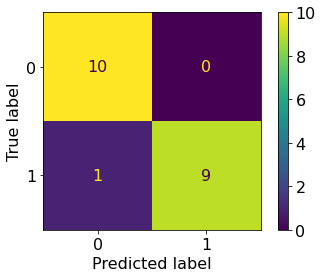

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, X_test, y_test)

In [21]:
# 미국 의대생의 입학 관련 데이터셋

# Acceptance : 0이면 불합격, 1이면 합격
# BCPM : Bio/Chem/Physics/Math 생/화/물/수 평균
# GPA : 전체 과목 학점 평균
# VR : MCAT Verbal reasoning 과목 점수
# PS : MCAT Physical Sciences 과목 점수
# WS : MCAT Writing Sample 과목 점수
# BS : MCAT Biological Sciences 과목 점수
# MCAT : MCAT 총점
# Apps : 의대 지원 횟수

data_med=sm.datasets.get_rdataset("MedGPA", package="Stat2Data")
df_med=data_med.data
df_med.tail()

,Accept,Acceptance,Sex,BCPM,GPA,VR,PS,WS,BS,MCAT,Apps
50,D,0,M,2.41,2.72,8,8,8.0,8,32,7
51,D,0,M,3.51,3.56,11,8,6.0,9,34,6
52,A,1,F,3.43,3.48,7,10,7.0,10,34,14
53,D,0,M,2.61,2.80,7,5,NaN,6,18,6
54,D,0,M,3.36,3.44,11,11,8.0,9,39,1


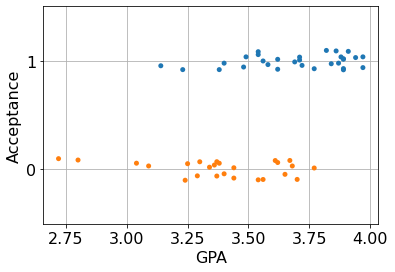

In [34]:
# 학점과 합격 여부의 상관관계
import seaborn as sns
sns.stripplot(x="GPA", y="Acceptance", data=df_med, jitter=True, orient='h', order=[1,0])
# jitter : 데이터의 수가 많을 경우 겹치지 않도록 하는 옵션
plt.grid(True)
plt.show()

In [23]:
model_med=sm.Logit.from_formula("Acceptance ~ Sex + BCPM + GPA + VR + PS + WS + BS + Apps", df_med)
result_med=model_med.fit()
print(result_med.summary())

Optimization terminated successfully.
         Current function value: 0.280736
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             Acceptance   No. Observations:                   54
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            8
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.5913
Time:                        14:55:55   Log-Likelihood:                -15.160
converged:                       True   LL-Null:                       -37.096
Covariance Type:            nonrobust   LLR p-value:                 6.014e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -46.6414     15.600     -2.990      0.003     -77.216     -16.067
Sex[T.M]      -2.2835      1.

In [24]:
# 1974년 '여성은 가정을 보살피고 국가를 운영하는 일은 남자에게 맡겨두어야 한다.' 라는 주장에 대한 찬반을 조사
# education : 교육 기간
# sex : 성별
# agree : 찬성 인원, disagree : 반대 인원
# ratio : 찬성 비율

data_wrole=sm.datasets.get_rdataset("womensrole", package="HSAUR")
df_wrole=data_wrole.data
df_wrole["ratio"]=df_wrole.agree/(df_wrole.agree+df_wrole.disagree)
df_wrole.tail()

,education,sex,agree,disagree,ratio
37,16,Female,13,115,0.101562
38,17,Female,3,28,0.096774
39,18,Female,0,21,0.000000
40,19,Female,1,2,0.333333
41,20,Female,2,4,0.333333


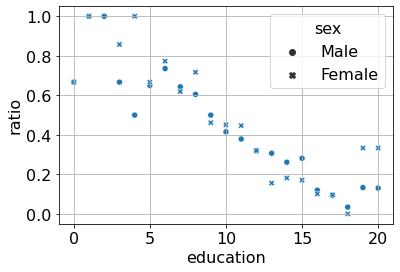

In [26]:
# 교육 수준이 높을수록 찬성 비율이 감소하고 있음 (음의 상관 관계)
sns.scatterplot(x="education", y="ratio", style="sex", data=df_wrole)
plt.grid(True)
plt.show()

In [27]:
model_wrole=sm.Logit.from_formula("ratio ~ education + sex", df_wrole)
result_wrole=model_wrole.fit()
print(result_wrole.summary())
# 성별은 유의하지 않음

Optimization terminated successfully.
         Current function value: 0.448292
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            2
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3435
Time:                        15:09:59   Log-Likelihood:                -18.380
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 6.660e-05
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.0442      0.889      2.299      0.022       0.302       3.787
sex[T.Male]    -0.1968    

In [28]:
# 성별을 제거한 모형
model_wrole2=sm.Logit.from_formula("ratio ~ education", df_wrole)
result_wrole2=model_wrole2.fit()
print(result_wrole2.summary())

Optimization terminated successfully.
         Current function value: 0.449186
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  ratio   No. Observations:                   41
Model:                          Logit   Df Residuals:                       39
Method:                           MLE   Df Model:                            1
Date:                Tue, 07 Dec 2021   Pseudo R-squ.:                  0.3422
Time:                        15:10:35   Log-Likelihood:                -18.417
converged:                       True   LL-Null:                       -27.997
Covariance Type:            nonrobust   LLR p-value:                 1.202e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9345      0.781      2.478      0.013       0.405       3.464
education     -0.2117      0.

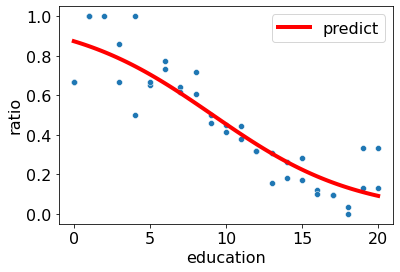

In [29]:
import pandas as pd

sns.scatterplot(x="education", y="ratio", data=df_wrole)
xx=np.linspace(0,20,100)
df_wrole_p=pd.DataFrame({"education": xx})
plt.plot(xx, result_wrole2.predict(df_wrole_p), "r-", lw=4, label="predict")
plt.legend()
plt.show()